# Exploring the database

Connecting the database

In [1]:
import os
import psycopg2
from dotenv import load_dotenv


In [2]:
load_dotenv()

DB_HOST = os.getenv('DB_HOST')
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
DB_PORT = os.getenv('DB_PORT')

Establish a connection to the database

In [3]:
conn = psycopg2.connect(
    host=DB_HOST,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASS,
    port=DB_PORT
)

cur = conn.cursor()

cur.description

Load and prepare the data

In [9]:
import pandas as pd

cur.execute("SELECT * FROM sales")

data = cur.fetchall()
df = pd.DataFrame(data, columns=[desc[0] for desc in cur.description])

df

,id,email,date,value,quantity,product
0,1,kelly@gmail.com,2024-09-18 09:00:00,0.02,1,Product 1
1,2,joao@gmail.com,2024-09-18 09:00:00,0.060000000000000005,2,Product 2
2,3,patricia@hotmail.com,2024-09-18 13:00:00,452.0,3,Product 3
3,4,claudia@gmail.com,2024-09-18 11:00:00,56.0,1,Product 3
4,5,marciop@hotmail.com,2024-09-18 09:00:00,546.0,1,Product 2
5,6,camila@outlook.com,2024-09-18 11:15:00,465.0,3,Product 1
6,7,pasern@gmail.com,2024-09-18 09:00:00,984.0,2,Product 2
7,8,pasern@gmail.com,2024-09-18 09:00:00,984.0,2,Product 2
8,9,hauda@gmail.com,2024-09-18 09:00:00,56.0,1,Product 1
9,10,ihjhioj@huh.shjio,2024-09-18 09:00:00,0.01,1,Product 1


Since our dataset contains unrealistic or erroneous values, we need to exclude them to ensure data quality. To achieve this, we can implement various methods to detect and remove outliers. 

Let's say that there is no product that costs less than 20 dollars.

In [10]:
new_df = df[(df["value"] >= 20) & (round(df['value'], 2))]

new_df

,id,email,date,value,quantity,product
2,3,patricia@hotmail.com,2024-09-18 13:00:00,452.0,3,Product 3
3,4,claudia@gmail.com,2024-09-18 11:00:00,56.0,1,Product 3
4,5,marciop@hotmail.com,2024-09-18 09:00:00,546.0,1,Product 2
5,6,camila@outlook.com,2024-09-18 11:15:00,465.0,3,Product 1
6,7,pasern@gmail.com,2024-09-18 09:00:00,984.0,2,Product 2
7,8,pasern@gmail.com,2024-09-18 09:00:00,984.0,2,Product 2
8,9,hauda@gmail.com,2024-09-18 09:00:00,56.0,1,Product 1
10,11,barbosa@gmai.com,2024-09-19 16:15:00,89715.0,6,Product 3
11,12,gustavo@gmail.com,2024-09-19 13:45:00,950.0,2,Product 2
12,13,gustavo@gmail.com,2024-09-18 11:30:00,200.0,1,Product 1


## Which is the most sold product?

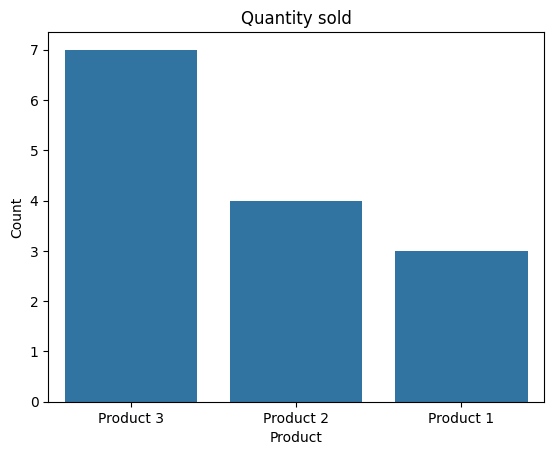

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='product', data=new_df)
plt.title('Quantity sold')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

## What is the daily sales pattern over the course of the dataset?

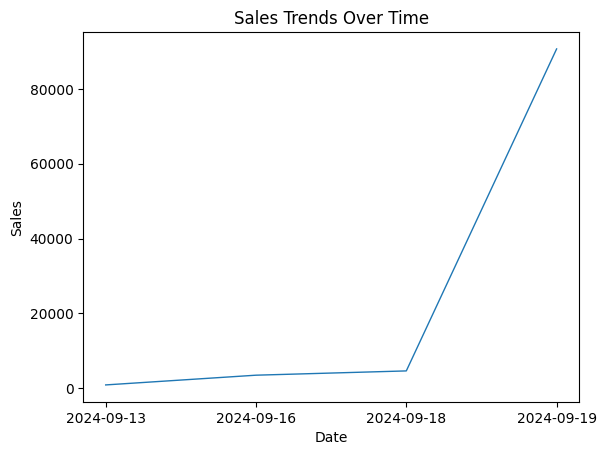

In [13]:
df_grouped = df.groupby(df['date'].dt.date)['value'].sum()
dates = [d.strftime('%Y-%m-%d') for d in df_grouped.index]

plt.plot(dates, df_grouped.values, lw=1)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Which employee sold the most products?

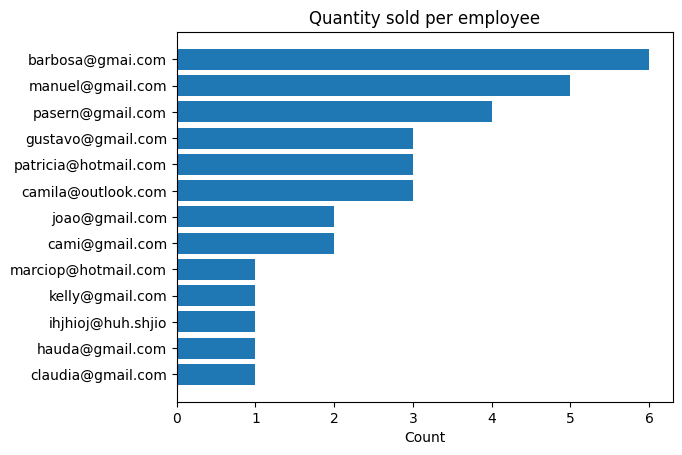

In [8]:
df_email = df.groupby(df['email'])['quantity'].sum().sort_values(ascending=True)


plt.barh(df_email.index, df_email.values)
plt.title('Quantity sold per employee')
plt.xlabel('Count')
# plt.ylabel('Email')
plt.show()